In [358]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [359]:
def getData():
    # Get home data from CSV file
    dataFile = None
    if os.path.exists('home_data.csv'):
        print("-- home_data.csv found locally")
        dataFile = pd.read_csv('home_data.csv', skipfooter=1)

    return dataFile

In [360]:
data = getData()
data.head()

-- home_data.csv found locally


C:\Users\vanhu\AppData\Local\Temp\ipykernel_15408\3913075788.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dataFile = pd.read_csv('home_data.csv', skipfooter=1)


,crime_rate,proportion_of_residential_land_zoned,proportion_of_non-retail_business,charles_river_dummy_variable,nitric_oxides_concentration,avg_numb_ofrooms,age,dis,index_of_accessibility_to_radial_highways,tax,ptratio,b,l_stat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.00,36.2


In [361]:
data.columns

Index(['crime_rate', 'proportion_of_residential_land_zoned',
       'proportion_of_non-retail_business', 'charles_river_dummy_variable',
       'nitric_oxides_concentration', 'avg_numb_ofrooms', 'age', 'dis',
       'index_of_accessibility_to_radial_highways', 'tax', 'ptratio', 'b',
       'l_stat', 'medv'],
      dtype='object')

In [362]:
def linearRegressionModel(X_train, Y_train, X_test, Y_test):
    linear = linear_model.LinearRegression()
    linear.fit(X_train, Y_train)
    score_trained = linear.score(X_test, Y_test)
    rmse = np.sqrt(np.mean((linear.predict(X_test) - Y_test) ** 2))
    rmse_train = np.sqrt(np.mean((linear.predict(X_train) - Y_train) ** 2))
    return (score_trained,rmse, linear,rmse_train)

def lassoRegressionModel(X_train, Y_train, X_test, Y_test):
    lasso_linear = linear_model.Lasso(alpha=1.0)
    lasso_linear.fit(X_train, Y_train)
    score_trained = lasso_linear.score(X_test, Y_test)
    rmse = np.sqrt(np.mean((lasso_linear.predict(X_test) - Y_test) ** 2))
    rmse_train = np.sqrt(np.mean((lasso_linear.predict(X_train) - Y_train) ** 2))
    return (score_trained , rmse, lasso_linear,rmse_train)


In [363]:
attributes = list(
    [
        'crime_rate',
        'age',
        'tax',
        'dis',
    ]
)
Y = data['ptratio']
X = data['age']

In [364]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(X).reshape(-1,1), np.array(Y).reshape(-1,1), test_size=0.3)

Linear RMSE test =  2.0294737813588193 RMSE train =  2.129461891711652
Lasso RMSE test =  2.1507082420815635 RMSE train =  2.2438335776136396


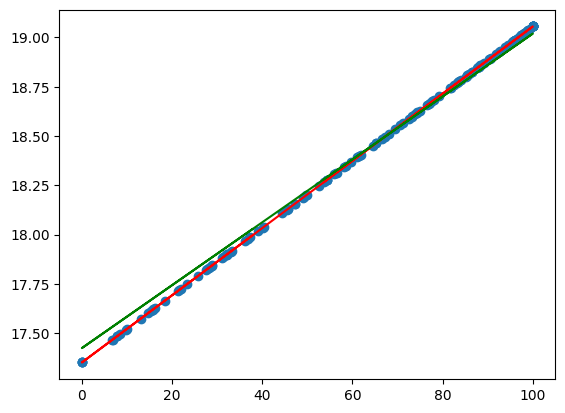

In [365]:
#modify Y_Test with some random values

linear = linearRegressionModel(X_train, Y_train, X_test, Y_test)
print('Linear RMSE test = ' , linear[1], 'RMSE train = ',  linear[3])



lasso = lassoRegressionModel(X_train, Y_train, X_test, Y_test)
print ('Lasso RMSE test = ', lasso[1], 'RMSE train = ',  lasso[3])
plt.scatter(X_test, linear[2].predict(X_test))
plt.plot(X_train, linear[2].predict(X_train), color='red', label="Lasso" )
plt.plot(X_train, lasso[2].predict(X_train), color='green' , label="Lasso" )
plt.show()

In [366]:
Y = data['ptratio']
X = data[attributes]
X_train, X_test, Y_train, Y_test = train_test_split(np.array(X), np.array(Y), test_size=0.3)

linear = linearRegressionModel(X_train, Y_train, X_test, Y_test)
print('Linear RMSE test = ' , linear[1], 'RMSE train = ',  linear[3])

lasso = lassoRegressionModel(X_train, Y_train, X_test, Y_test)
print ('Lasso RMSE test = ', lasso[1], 'RMSE train = ',  lasso[3])


Linear RMSE test =  1.7847142249105719 RMSE train =  1.9724988772037866
Lasso RMSE test =  1.7871686611351318 RMSE train =  1.9745287483599958
